<a href="https://colab.research.google.com/github/thaismazzo/thais-no-gama/blob/main/An%C3%A1lise_do_estado_estacion%C3%A1rio_de_um_sistema_de_tanques_de_mistura_e_reator_CSTR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Equações algébricas lineares

***Análise do estado estacionario de um sistema de tanques de mistura e reator CSTR***

Desenvolva um modelo, em estado estacionário, para o sistema a seguir envolvendo três reatores CSTR onde ocorre uma reação $A\rightarrow B$ com cinética de primeira ordem em condições isotérmicas.A saída do primero reator alimenta os dois reatores seguintes conforme a seguinte especificação:$F_{3}=0,6F_{2}.$ O produto do último reator é separado em duas correntes e uma parte $(F_{7} = 0,2F_{6})$ é enviado para um tanque de mistura onde a composição de saída é misturada com uma corrente contendo apenas o reagente $A$ e a saída desse tanque alimenta o primero reator, conforme apresentado na Figura 1.

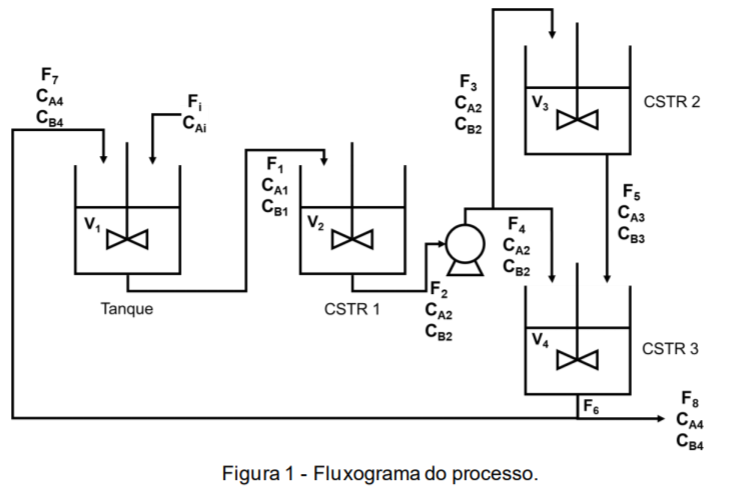

$F$ são as vazões volumétricas$(m^{3}/min)$ e $C$ as concentrações das espécies quimicas em interesse $(mol/m^{3}).$ As vazões estão intimamente realcionadas com a análise da conservação de massa total do sistema, representada pelos balanços globais. Considerando cada unidade um sistema, o seu balanço de massa pode ser expresso como:

$\sum_{entradas} - \sum_{saídas} = 0$

Por sua vez, as concentrações de cada tanque estão relacionadas ás análises da conservação de massa, representada pelo balanço de massa do componente A, que para cada uma das unidades é dado por:

$\sum_{entradas} - \sum_{saídas} +/-(geração/consumo) = 0$

Pede-se:

Calcule as concentrações do reagente A em cada reator e no tanque de mistura, bem como as vazões resultantes dos balanços, sabendo que a alimentação de reagentes $A$ puro tem $F_{i} = 8m^{3}/min$ e uma concentração de $C_{Ai} = 2mol/m^{3}.$ Utilize $k=0,0544min,V_{1} = 0,3m^{3},V_{2}=0,25m^{3},V_{3} = 0,5m^{3} e  V_{4} = 0,45m^{3}.$ 

Para isso,faça:

a) Implementação da regra de Cramer;


b) O Cálculo da inversa da matriz $X = A^{-1}b;$


Verifique se os métodos aplicados fornecem os mesmo valores numéricos para a concentração de $A,$ bem como das vazões de interesse em cada corrente.

In [ ]:
# Bibliotecas
import numpy as np
import math as math

In [ ]:
# Funções para Gaussianas
def GaussPivoteamento(A,b):
  
  for i in range(len(A)): #Acessando as linhas da matriz    
    pivo = math.fabs(A[i][i]) #Verificando qual é o maior pivô
    linhaPivo = i 
    for j in range(i+1,len(A)): #da linha abaixo até a ultima linha da matriz
      if math.fabs(A[j][i])> pivo: #linha j coluna i
        pivo = math.fabs(A[j][i]) #caso seja maior, esse elemento se torna o proprio pivô
        linhaPivo = j #a linha em que o pivô se encontra é atualizada
    
    if linhaPivo != i: #
      linhaAuxiliar = A[i] #recebe linha atual da matriz
      A[i] = A[linhaPivo] #recebe a linha do pivô
      A[linhaPivo] = linhaAuxiliar #a linha do pivô recebe a linha auxiliar
      bAuxiliar = b[i] #permutação entre as linhas
      b[i] = b[linhaPivo]
      b[linhaPivo] = bAuxiliar
    #Eliminação Gaussiana
    for k in range(i+1,len(A)): #percorrer da linha abaixo até a ultima
      multiplicador = A[k][i]/A[i][i] #calcula-se o multiplicador
      for n in range(i,len(A)): #n representa a coluna - linha k coluna n
        A[k][n] -= multiplicador*A[i][n] 
      b[k] -= multiplicador*b[i] 
  #Print
  for m in range(len(A)): 
    print(A[m])
  print('\n',b)
  Resolve(A,b)

def Resolve(A,b): #vamos ir achando as nossas soluções depois do escalonamento da matriz anterior
  Solution = []
  for i in range(len(A)):
    Solution.append(0) #criando vetor de zeros das dimensoes de A; iremos trocando os zeros pelas soluções
  linha = len(A)-1 #começamos da ultima linha para a primeira // -1 corrige o python
  while linha >= 0:
    x = b[linha]
    coluna = len(A)-1
    while coluna > linha: 
      x -= A[linha][coluna]*Solution[coluna] #encontrando as soluções facilmente
      coluna -= 1
    x/=A[linha][linha] #dividimos a variável pelo seu coeficiente
    linha -= 1
    Solution[coluna] = x #acrescenta-se na solução
  for j in range(len(Solution)):
    print("Ca"+str(j)+" = ",round(Solution[j],5))

F = [8,10,10,6,4,6,10,2,8] #m³/min
V = [0.3,0.25,0.5,0.45] #m³
K = 0.0544
Ca = np.zeros(5)
Ca[0] = 2 #mol/m³

#Balanços dos reatores e do tanque
A = ([[0,F[4],F[5],(-F[6]-K*V[3])],  # CSTR3
      [F[1],(-F[2]-K*V[1]),0,0],     # CSTR1
      [0,F[3],(-F[5]-K*V[2]),0],     # CSTR2
      [(-F[1]),0,0,F[7]]])           # Tanque
B1 = np.array([0,0,0,(-F[0]*Ca[0])])


print('Gauss Pivoteamento')
print(GaussPivoteamento(A,B1),"\n")

Gauss Pivoteamento
[10, -10.0136, 0, 0]
[0.0, -10.0136, 0.0, 2.0]
[0.0, 8.881784197001252e-16, -6.0272, 1.1983702165055523]
[0.0, 0.0, 0.0, -8.032604400775128]

 [  0.         -16.          -9.58696173 -15.93500479]
Ca0 =  1.99676
Ca1 =  1.99405
Ca2 =  1.98505
Ca3 =  1.98379
None 



In [ ]:
#Pela inversa
Matriz_inversa = np.linalg.inv(A)
X = Matriz_inversa@B1
print("Matriz Inversa",'\n')
print(np.round(Matriz_inversa,4),'\n')
print("Resultados em mol/m³",'\n')
print(np.round(X,4))

Matriz Inversa 

[[ 0.1    -0.1     0.     -0.0249]
 [-0.     -0.0999 -0.     -0.0249]
 [-0.     -0.     -0.1659 -0.0248]
 [-0.     -0.     -0.     -0.1245]] 

Resultados em mol/m³ 

[1.9968 1.994  1.985  1.9838]


In [ ]:
import numpy as np
# Função para Regra de Cramer
def Cramer(A,R) :
    from copy import deepcopy
    l = A.shape[0] #Número de linhas da matriz A
    D = np.linalg.det(A) #Calcula-se o determinante da matriz A
    det = np.zeros(l) #Faz-se uma matriz linha composta de zeros
    for coluna in range(l) :
        Acopia = deepcopy(A)
        for i in range(l):
          
          Acopia[i,coluna] = R[i] #substitui os valores da primeira coluna pelo vetor Resolução 
          
        det[coluna] = np.linalg.det(Acopia)
    res = np.zeros(l)
    for i in range(len(det)) :
        res[i] = det[i]/D #Calcula-se o valor de cada concentração (1,2,3 e 4)
    return res

A = np.array([[0,F[4],F[5],(-F[6]-K*V[3])],  # CSTR3
      [F[1],(-F[2]-K*V[1]),0,0],     # CSTR1
      [0,F[3],(-F[5]-K*V[2]),0],     # CSTR2
      [(-F[1]),0,0,F[7]]])           # Tanque
B1 = np.array([0,0,0,(-F[0]*Ca[0])])

print("Cramer:",np.round(Cramer(A,B1),4))
  

Cramer: [1.9968 1.994  1.985  1.9838]
Cramer: [1.9968 1.994  1.985  1.9838]
Cramer: [1.9968 1.994  1.985  1.9838]
Cramer: [1.9968 1.994  1.985  1.9838]
